C:\Users\kp\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


Text(0, 0.5, 'Frequency of Items in Transactional Database')

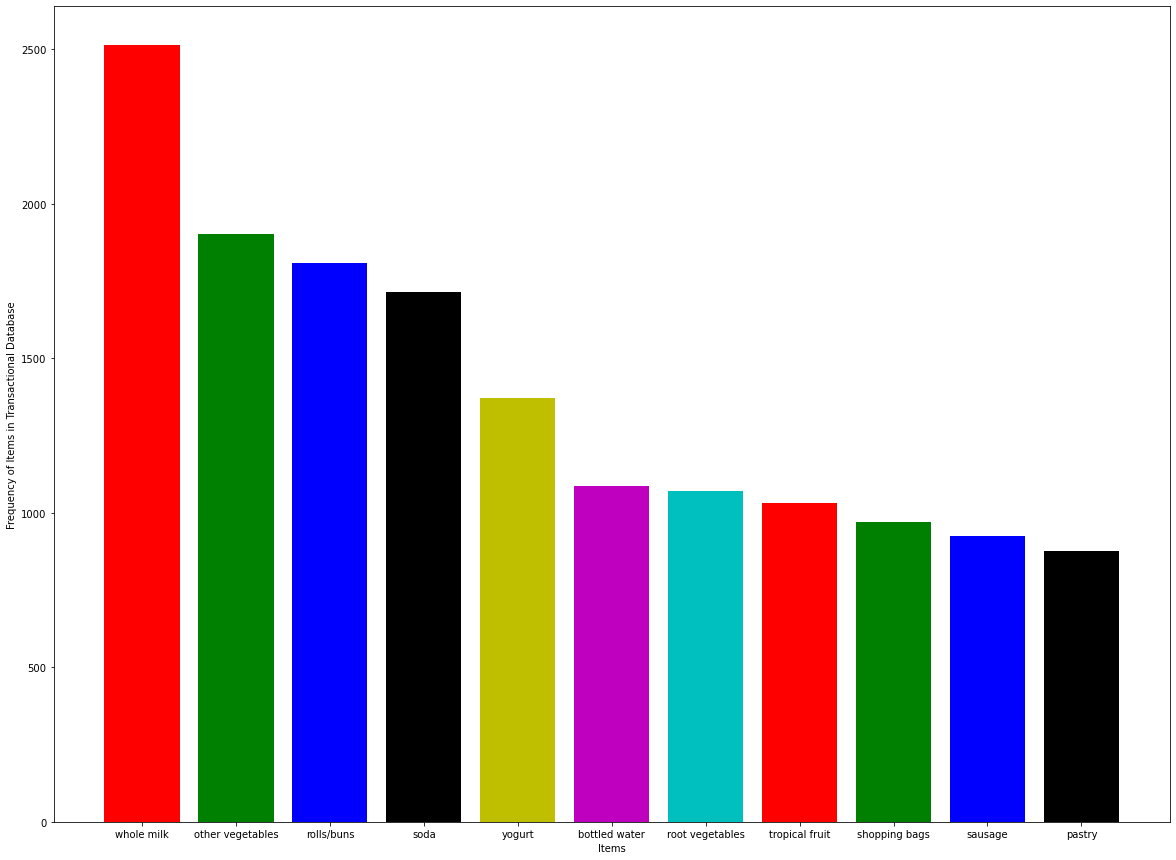

In [115]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from collections import Counter
import matplotlib.pyplot as plt
import re

database = []
# Add the Contents of csv to the list such that Each Transaction is Separarted by \n
with open("C:\\Users\\kp\\Pictures\\Assignments\\Association Rule Mining[ARM]\\groceries.csv") as f:
    database = f.read()

# splitting the data into separate transactions using separator as "\n", converting a single string into list of strings
database = database.split("\n")
transactions_list = []
# Converting list of strings to list of list of strings
for i in database:
    transactions_list.append(i.split(","))

all_items_database = [i for item in transactions_list for i in item]

item_frequencies = Counter(all_items_database)
item_frequencies = sorted(item_frequencies.items(), key=lambda x: x[1])

# Storing frequencies and items in separate variables
frequencies = list(reversed([i[1] for i in item_frequencies]))
items = list(reversed([i[0] for i in item_frequencies]))

#Bar plot of Items frequency
plt.figure(figsize=(20, 15))
plt.bar(height=frequencies[0:11], x=items[0:11], color='rgbkymc')
plt.xlabel("Items")
plt.ylabel("Frequency of Items in Transactional Database")

C:\Users\kp\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  app.launch_new_instance()


Text(0, 0.5, 'Support')

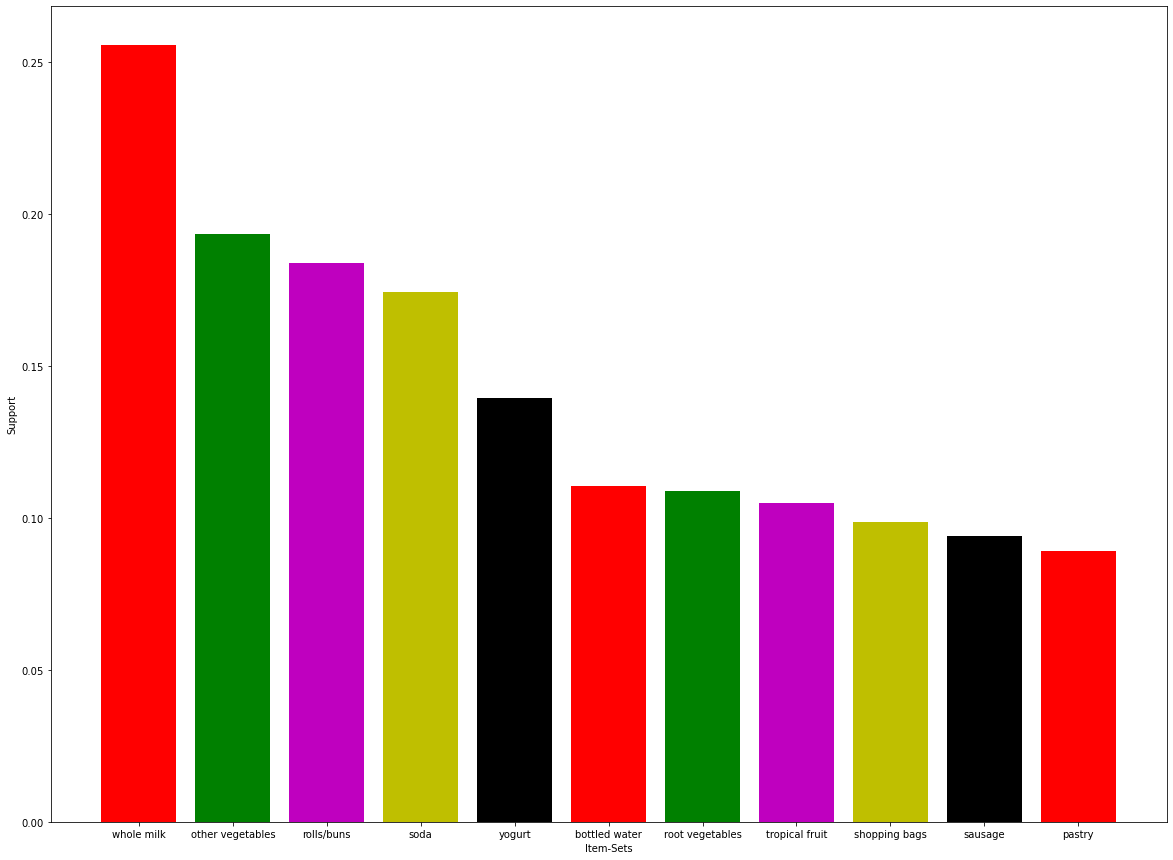

In [116]:
# Purpose of converting all lists into Series objects which is further converted to Dataframe
transaction_groceries  = pd.DataFrame(pd.Series(transactions_list))
transaction_groceries = transaction_groceries.iloc[:9835, :] # removing the last empty transaction
transaction_groceries.columns = ["Transactions"]
# creating a dummy columns for the each item in each transactions ... Using column names as item name
X = transaction_groceries['Transactions'].str.join(sep='*').str.get_dummies(sep='*')
frequent_itemsets = apriori(X, min_support=0.005, max_len=3,use_colnames = True)
frequent_itemsets.sort_values('support',ascending = False,inplace=True)
#Convert Frozen sets to list of Lists
dummy_variable=[list(x) for x in frequent_itemsets.itemsets[0:11]]
#Convert List of Lists to List
frequency_items_list=[item for sublist in dummy_variable for item in sublist]

#Bar plot of Itemsets with the corresponding support
plt.figure(figsize=(20,15))
plt.bar(x=frequency_items_list,height = frequent_itemsets.support[0:11],color='rgmyk')
plt.xlabel('Item-Sets')
plt.ylabel('Support')

In [117]:
rules_mining = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

#Convert Frozen set to list
def to_list(i):
    return (list(i))

redundant_list = rules_mining.antecedents.apply(to_list) + rules_mining.consequents.apply(to_list)

#Sort the list such that the elements in the list are arranged in alphabetical order
redundant_list = redundant_list.apply(sorted)

#Convert list of strings to string
redundant_list=redundant_list.str.join(',')
rules_mining["Antecedents_Consequents"]=pd.Series(redundant_list)

#Removing Rules that are repeated more than once which has the same support which is not required
rules_mining.drop_duplicates(subset ="Antecedents_Consequents", keep ='first', inplace = True)
rules_mining.sort_values('lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,Antecedents_Consequents
2558,(ham),(white bread),0.026029,0.042095,0.005084,0.195312,4.639851,0.003988,1.190407,"ham,white bread"
1312,(root vegetables),(herbs),0.108998,0.016268,0.007016,0.064366,3.956477,0.005243,1.051406,"herbs,root vegetables"
2040,"(root vegetables, other vegetables)",(onions),0.047382,0.031012,0.005694,0.120172,3.875044,0.004225,1.101338,"onions,other vegetables,root vegetables"
776,(whipped/sour cream),(berries),0.071683,0.033249,0.009049,0.126241,3.796886,0.006666,1.106428,"berries,whipped/sour cream"
1468,"(whipped/sour cream, whole milk)",(butter),0.032232,0.055414,0.006711,0.208202,3.757185,0.004925,1.192963,"butter,whipped/sour cream,whole milk"
2432,"(curd, tropical fruit)",(yogurt),0.010269,0.139502,0.005287,0.514851,3.690645,0.003855,1.773680,"curd,tropical fruit,yogurt"
2018,"(whipped/sour cream, other vegetables)",(butter),0.028876,0.055414,0.005796,0.200704,3.621883,0.004195,1.181772,"butter,other vegetables,whipped/sour cream"
1870,"(domestic eggs, whole milk)",(butter),0.029995,0.055414,0.005999,0.200000,3.609174,0.004337,1.180732,"butter,domestic eggs,whole milk"
1764,(hygiene articles),(napkins),0.032944,0.052364,0.006101,0.185185,3.536498,0.004376,1.163008,"hygiene articles,napkins"
2202,"(pip fruit, tropical fruit)",(citrus fruit),0.020437,0.082766,0.005592,0.273632,3.306105,0.003901,1.262768,"citrus fruit,pip fruit,tropical fruit"
